In [24]:
%load_ext autoreload
%autoreload 2


import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from stats import *


%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
import ok


In [25]:
reso = "low"

data_path = "/gpfsdswork/dataset/ClimSim_low-res/train/"
filelist = [data_path + '0008-02/E3SM-MMF.mli.0008-02-0'+str(i)+'-00000.nc' for i in range(1, 10, 1)]
grid = 'scvt/ClimSim_low-res_grid-info.nc'
grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'
nc_file = 'test.nc'
npy_pred = ['../data/npy_data/prediction/npy_prediction_'+str(i)+'.npy' for i in range(2)]

var = 'ptend_t'

In [33]:
In, Out = load_ncfiles(filelist[0], grid_b)

Out.to_netcdf("Out.nc")
In.to_netcdf("In.nc")

time counter =  82


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [20]:
pred = npy_toxarray(npy_pred, grid_b)


time counter =  120


In [29]:
In

<xarray.Dataset>
Dimensions:           (lev: 60, ilev: 61, ncol: 384, nvertex: 10,
                       time_counter: 9)
Coordinates:
  * lev               (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
    lat               (ncol) float64 ...
    lon               (ncol) float64 ...
  * ilev              (ilev) float64 0.0 1.0 2.0 3.0 4.0 ... 57.0 58.0 59.0 60.0
    bounds_lat        (ncol, nvertex) float64 ...
    bounds_lon        (ncol, nvertex) float64 ...
  * time_counter      (time_counter) int64 0 1 2 3 4 5 6 7 8
Dimensions without coordinates: ncol, nvertex
Data variables: (12/37)
    P0                float64 ...
    Ps                float64 ...
    PI                (ilev, ncol) float64 ...
    area              (ncol) float64 ...
    hyai              (ilev) float64 ...
    hyam              (lev) float64 ...
    ...                ...
    state_t           (time_counter, lev, ncol) float64 213.0 212.9 ... 271.4
    state_u           (time_counter, lev, ncol) float64 -79.4 -82.03 ... 5.392
    state_v           (time_counter, lev, ncol) float64 19.16 13.94 ... -0.5333
    pbuf_CH4          (time_counter, lev, ncol) float64 1.705e-07 ... 9.986e-07
    pbuf_N2O          (time_counter, lev, ncol) float64 2.709e-08 ... 4.909e-07
    pbuf_ozone        (time_counter, lev, ncol) float64 2.501e-07 ... 7.28e-08
Attributes:
    description:  test_climsim

In [336]:
Out


<xarray.Dataset>
Dimensions:         (lev: 60, ncol: 384, nvertex: 10, time_counter: 9)
Coordinates:
  * lev             (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
    lat             (ncol) float64 ...
    lon             (ncol) float64 ...
    bounds_lat      (ncol, nvertex) float64 ...
    bounds_lon      (ncol, nvertex) float64 ...
  * time_counter    (time_counter) int64 0 1 2 3 4 5 6 7 8
Dimensions without coordinates: ncol, nvertex
Data variables: (12/20)
    P0              float64 ...
    area            (ncol) float64 ...
    ymd             (time_counter) int32 80201 80202 80203 ... 80207 80208 80209
    tod             (time_counter) int32 0 0 0 0 0 0 0 0 0
    cam_out_FLWDS   (time_counter, ncol) float64 374.3 369.0 ... 213.6 228.5
    cam_out_NETSW   (time_counter, ncol) float64 0.0 0.0 0.0 ... 301.9 337.3
    ...              ...
    state_q0003     (time_counter, lev, ncol) float64 1.305e-11 ... 4.136e-24
    state_t         (time_counter, lev, ncol) float64 213.0 212.9 ... 271.3
    state_u         (time_counter, lev, ncol) float64 -79.4 -82.03 ... 5.425
    state_v         (time_counter, lev, ncol) float64 19.16 13.94 ... -0.5212
    ptend_t         (time_counter, lev, ncol) float64 -1.36e-05 ... -8.255e-05
    ptend_q0001     (time_counter, lev, ncol) float64 0.0 0.0 ... 3.236e-08
Attributes:
    description:  test_climsim

In [4]:
psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [8., 6.]

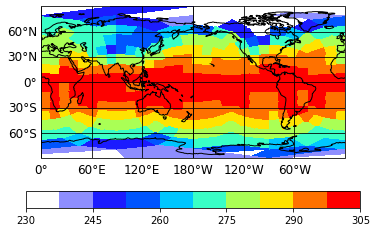

In [28]:
tmap = psy.plot.mapplot("In.nc", name='state_t', time_counter = 0, lev=59)

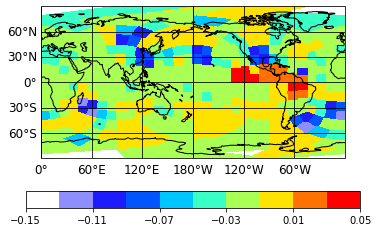

In [9]:
tma = pred.psy.plot.mapplot(name=var)

In [301]:
mean_t = Out.mean('time_counter', keep_attrs = True)

In [302]:
tmap = mean_t.psy.plot.mapplot(name=var,  lev = 59, cmap = 'bwr')

ValueError: Can only plot 2-dimensional data!